# XRAY TRANSFORMER

The specs of the transformer are as follows:

Single Phase, High Frequency High Voltage Transformer

Primary Winding Voltage ± 417 V (peak to peak 834 V for pulsing) 

Secondary Winding Voltage ± 12.5 kV (peak to peak 25 kV for pulsing)

Rated Power 30 kW (for maximum 100 milisecond) 

Switching Frequency Minimum 100 kHz 

Ambient Temperature 0-40 °C 

In [3]:
V_p=417
V_s=12500
P_out=30000
f=100000
T_min=0
T_max=0

Laminated steel would not be used for this type of application. Ferrite would normally be used for this type of application at the specified frequency. 

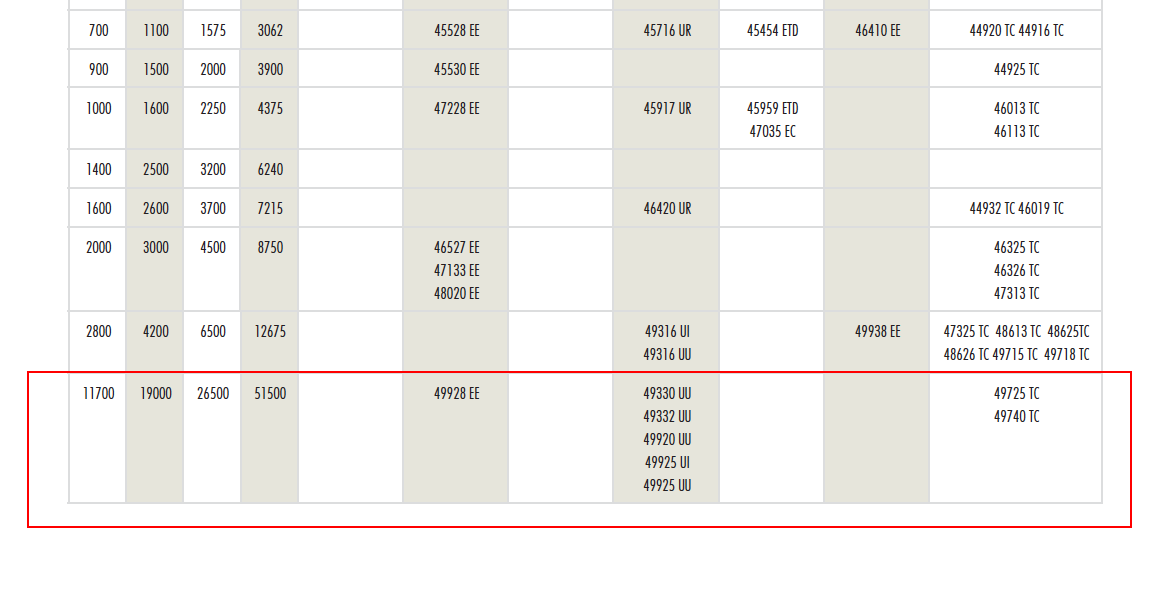

In [1]:
from IPython.display import Image
Image(filename='core.png', width=500, height=500)